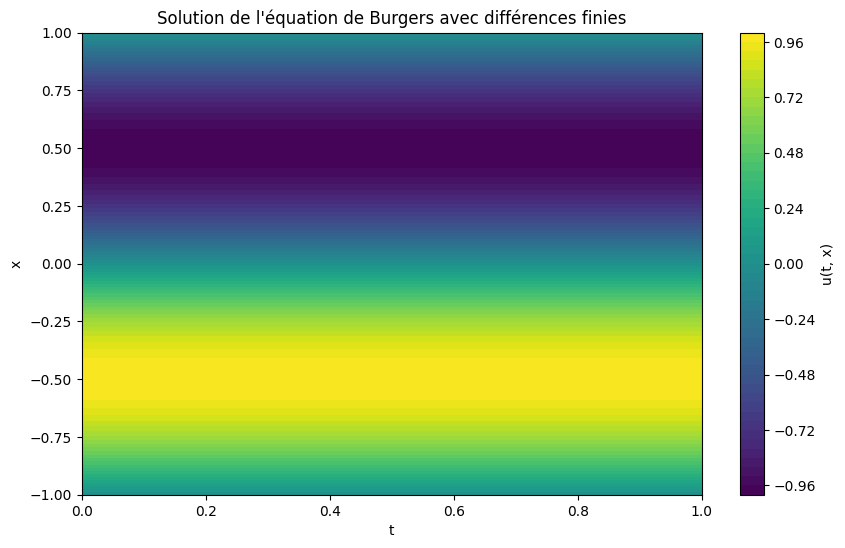

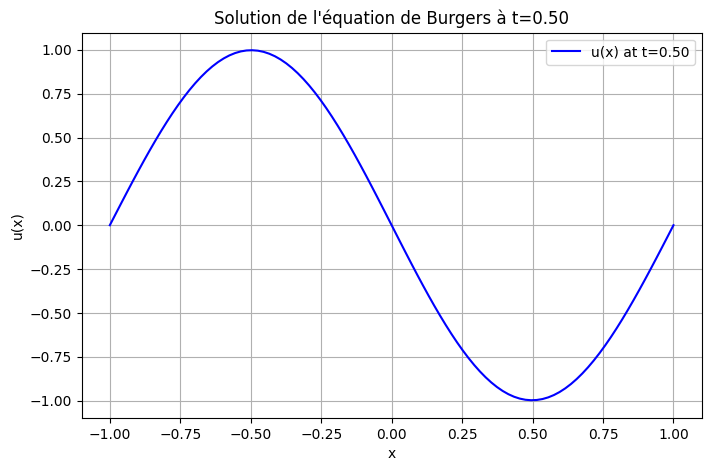

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# Paramètres
L = 2.0  # Domaine spatial [-1, 1]
T = 1.0  # Temps final
Nx = 100  # Nombre de points spatiaux
Nt = 500  # Nombre de points temporels
epsilon = 0.1  # Coefficient de viscosité

dx = L / (Nx - 1)
dt = T / Nt

# Grille spatiale et temporelle
x = torch.linspace(-1, 1, Nx, requires_grad=False)
t = torch.linspace(0, T, Nt, requires_grad=False)

# Conditions initiales et limites
def initial_condition(x):
    return -torch.sin(np.pi * x)

u = initial_condition(x).clone().detach()
u = u.unsqueeze(0).repeat(Nt, 1)  # Étendre pour tous les pas de temps

# Matrice pour différences finies
u_next = u.clone()
for n in range(1, Nt):
    u_prev = u[n - 1].clone()
    u_next[n, 1:-1] = (
        u_prev[1:-1]
        - dt / (2 * dx) * (u_prev[2:]**2 / 2 - u_prev[:-2]**2 / 2)
        + epsilon * dt / dx**2 * (u_prev[2:] - 2 * u_prev[1:-1] + u_prev[:-2])
    )
    # Conditions aux limites
    u_next[n, 0] = 0.0
    u_next[n, -1] = 0.0

# Visualisation
X, T = torch.meshgrid(x, t, indexing="xy")  # Utiliser 'xy' pour un bon alignement
plt.figure(figsize=(10, 6))
plt.contourf(T.numpy(), X.numpy(), u_next.numpy(), 50, cmap="viridis")
plt.colorbar(label="u(t, x)")
plt.xlabel("t")
plt.ylabel("x")
plt.title("Solution de l'équation de Burgers avec différences finies")
plt.show()

# Temps fixe pour la visualisation
time_index = Nt // 2  # Indice temporel (par exemple, milieu de la simulation)
time_fixed = t[time_index]  # Temps correspondant

# Extraire les données pour cet instant
u_fixed = u_next[time_index, :].numpy()

# Tracé de la courbe
plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), u_fixed, label=f"u(x) at t={time_fixed:.2f}", color="blue")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title(f"Solution de l'équation de Burgers à t={time_fixed:.2f}")
plt.legend()
plt.grid(True)
plt.show()


